In [1]:
import pandas as pd
import numpy as np

In [2]:
rel_cols = ['id',
 'Q_id',
 'Q',
 'tipo_preg',
 'A',
 'label',
 'gpt',
 'gpt-label',
 'eq',
 'mispelling',
 'is correct?',
 'is correct the answer?']
gpt_comp = pd.read_excel("D:\github\coherence-prediction/gpt_label_v7_comp.xlsx")[rel_cols].set_index("id")

In [3]:
tt = []
for i in range(6):
    o = gpt_comp[gpt_comp["tipo_preg"] == i]["label"].value_counts().to_dict()
    o["tipo_preg"] = i
    o["num_preg"] = gpt_comp[gpt_comp["tipo_preg"] == i]["Q_id"].unique().shape[0]
    tt.append(o)
pd.DataFrame(tt).set_index("tipo_preg").T

tipo_preg,0,1,2,3,4,5
0,107,8,39,262,11,114
1,42,1,18,41,5,29
num_preg,68,5,35,161,9,82


In [4]:
gpt_comp

,Q_id,Q,tipo_preg,A,label,gpt,gpt-label,eq,mispelling,is correct?,is correct the answer?
id,,,,,,,,,,,
48412,2724,¿Qué otras características son a tu juicio rel...,5,Nose,1,Incoherente /E>,1,1,1.0,NaN,NaN
48413,2724,¿Qué otras características son a tu juicio rel...,5,I,1,Incoherente /E>,1,1,1.0,NaN,NaN
48458,2727,¿Qué otras características son a tu juicio imp...,5,Y,1,Incoherente /E>,1,1,1.0,NaN,NaN
48516,2728,¿Fue muy difícil realizar la actividad de clas...,0,Bien porque fue fasil porque lo abia aprendid...,0,Coherente /E>,0,5,1.0,NaN,NaN
48519,2728,¿Fue muy difícil realizar la actividad de clas...,0,No porqué trabajado todas en equipo\n,0,Coherente /E>,0,5,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95322,5099,Crea un problema de división con los números 5...,5,tengo 56 autos y lo quiero repartir en mis 7 ...,0,Coherente /E>,0,5,1.0,NaN,NaN
95636,5094,Alejandra tiene una caja de 4x3x2 cm llena de ...,2,Yo lo que ise fue v=4•3•2 =12 12 •2=24cm³,0,Coherente /E>,0,5,1.0,NaN,NaN
95736,5126,¿Dónde se “mueve” la célula en nuestro modelo ...,5,El número mayor que está alrededor de la célul...,0,Incoherente /E>,1,25,0.0,NaN,NaN


In [5]:
from sklearn.metrics import precision_recall_fscore_support

In [6]:
precision_recall_fscore_support(gpt_comp[gpt_comp["mispelling"] == 0]["label"], gpt_comp[gpt_comp["mispelling"] == 0]["gpt-label"])

(array([0.95876289, 0.48360656]),
 array([0.81578947, 0.83098592]),
 array([0.88151659, 0.61139896]),
 array([342,  71], dtype=int64))

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
sns.set(font_scale=1) # for label size

Text(0.5, 0.98, 'Q3 report (GPT-3)')

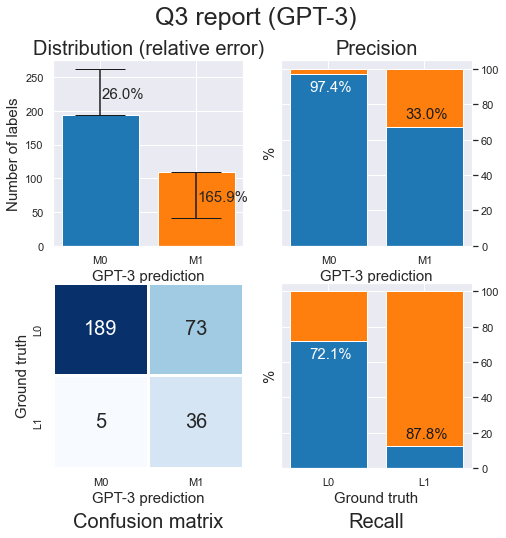

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(5*1.5, 5*1.5))

Q = 3
cfm_raw = gpt_comp[gpt_comp["tipo_preg"] == Q]["eq"].value_counts()
cfm = np.zeros((2, 2))
cfm[1, 1] = cfm_raw[1] if 1 in cfm_raw else 0
cfm[0, 0] = cfm_raw[5] if 5 in cfm_raw else 0
cfm[1, 0] = cfm_raw[25] if 25 in cfm_raw else 0
cfm[0, 1] = cfm_raw[100] if 100 in cfm_raw else 0
df_cfm = pd.DataFrame(cfm, columns="L0 L1".split(), index="M0 M1".split()).T
###
yerr = df_cfm.T.sum(axis=1).values-df_cfm.T.sum(axis=0).values
ax[0, 0].bar("M0 M1".split(), df_cfm.T.sum(axis=1), color =["tab:blue", "tab:orange"], width=0.8) 
ax[0, 0].bar("M0 M1".split(), df_cfm.T.sum(axis=1)-yerr/2, alpha=0, width=0.8, yerr=yerr/2, capsize=25) 
for i in range(2):
    yi = df_cfm.T.sum(axis=1)[i]-3*yerr[i]/8 if i == 0 else df_cfm.T.sum(axis=1)[i]-5*yerr[i]/8
    ax[0,0].annotate(str(np.round(-100*yerr[i]/df_cfm.T.sum(axis=0).values[i], 1)).replace("-", "")+"%",
                     xy =(i, 0),
                     xytext =(i+0.015, yi), size=15)
ax[0,0].set_title("Distribution (relative error)", size=20)
ax[0,0].set_ylabel("Number of labels", size=15)
ax[0, 0].set_xlabel("GPT-3 prediction", size=15);
###
pr = 100*df_cfm/df_cfm.sum(axis=0)
ax[0, 1].bar("M0 M1".split(), pr.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=pr.iloc[0])
ax[0, 1].bar("M0 M1".split(), pr.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
ax[0,1].set_title("Precision", size=20)
ax[0, 1].set_ylabel("%", size=15)
ax[0, 1].set_xlabel("GPT-3 prediction", size=15);
ax[0,1].annotate(str(np.round(pr.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, pr.iloc[0,0]-10), size=15, color="w")
ax[0,1].annotate(str(np.round(pr.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-pr.iloc[1,1])+5), size=15, color="k")
# ax[0, 1].yaxis.set_label_position("right")
ax[0, 1].yaxis.tick_right()
###
rl = 100*(df_cfm.T/df_cfm.T.sum(axis=0))
ax[1, 1].bar("L0 L1".split(), rl.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=rl.iloc[0])
ax[1, 1].bar("L0 L1".split(), rl.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
ax[1, 1].set_title("Recall", size=20, y=-0.35)
ax[1, 1].set_ylabel("%", size=15)
# ax[1, 1].yaxis.set_label_position("right")
ax[1, 1].set_xlabel("Ground truth", size=15);
ax[1,1].annotate(str(np.round(rl.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, rl.iloc[0,0]-10), size=15, color="w")
ax[1,1].annotate(str(np.round(rl.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-rl.iloc[1,1])+5), size=15, color="k")
ax[1, 1].yaxis.tick_right()
###
sns.heatmap(df_cfm, ax=ax[1, 0], annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=3, cmap="Blues", cbar=False);
ax[1, 0].set_ylabel("Ground truth", size=15);
ax[1, 0].set_xlabel("GPT-3 prediction", size=15);
ax[1, 0].set_title("Confusion matrix", size=20, y=-0.35);
plt.suptitle(f"Q{Q} report (GPT-3)", size=25)

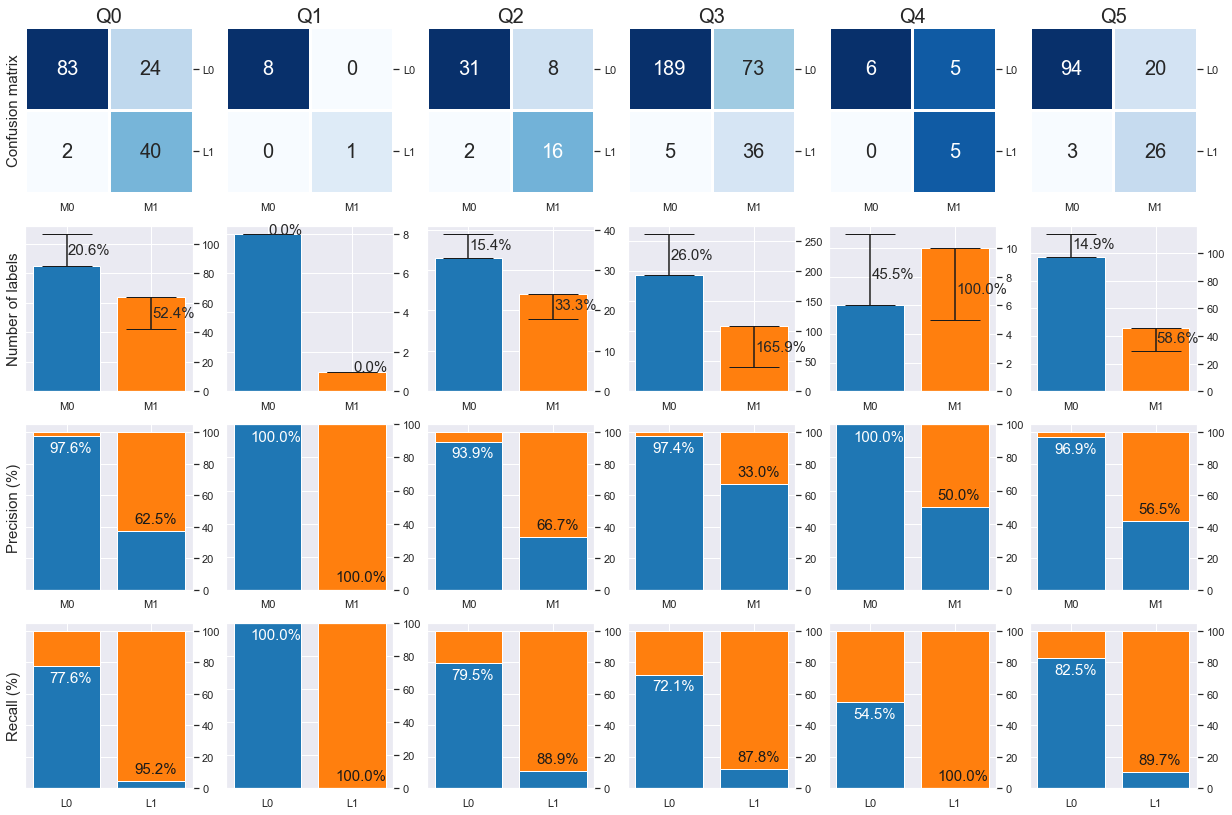

In [599]:
gpt_cfm = {}
fig, ax = plt.subplots(4, 6, figsize=(6*5*.7, 4*5*.7))
for ix in range(6):
    Q = ix
    cfm_raw = gpt_comp[gpt_comp["tipo_preg"] == Q]["eq"].value_counts()
    cfm = np.zeros((2, 2))
    cfm[1, 1] = cfm_raw[1] if 1 in cfm_raw else 0
    cfm[0, 0] = cfm_raw[5] if 5 in cfm_raw else 0
    cfm[1, 0] = cfm_raw[25] if 25 in cfm_raw else 0
    cfm[0, 1] = cfm_raw[100] if 100 in cfm_raw else 0
    df_cfm = pd.DataFrame(cfm, columns="L0 L1".split(), index="M0 M1".split()).T
    gpt_cfm[ix] = df_cfm
    ###
    yerr = df_cfm.T.sum(axis=1).values-df_cfm.T.sum(axis=0).values
    ax[1, ix].bar("M0 M1".split(), df_cfm.T.sum(axis=1), color =["tab:blue", "tab:orange"], width=0.8) 
    ax[1, ix].bar("M0 M1".split(), df_cfm.T.sum(axis=1)-yerr/2, alpha=0, width=0.8, yerr=yerr/2, capsize=25) 
    for i in range(2):
        yi = df_cfm.T.sum(axis=1)[i]-3*yerr[i]/8 if i == 0 else df_cfm.T.sum(axis=1)[i]-5*yerr[i]/8
        ax[1,ix].annotate(str(np.round(-100*yerr[i]/df_cfm.T.sum(axis=0).values[i], 1)).replace("-", "")+"%",
                         xy =(i, 0),
                         xytext =(i+0.015, yi), size=15)
#     ax[1,ix].set_title("Distribution (relative error)", size=20)
    if ix==0:
        ax[1,ix].set_ylabel("Number of labels", size=15)
#     ax[1,ix].set_xlabel("GPT-3 prediction", size=15);
    ax[1, ix].yaxis.tick_right()
    ###
    pr = 100*df_cfm/df_cfm.sum(axis=0)
    ax[2, ix].bar("M0 M1".split(), pr.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=pr.iloc[0])
    ax[2, ix].bar("M0 M1".split(), pr.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
#     ax[2, ix].set_title("Precision", size=20)
    if ix == 0:
        ax[2, ix].set_ylabel("Precision (%)", size=15)
#     ax[2, ix].set_xlabel("GPT-3 prediction", size=15);
    ax[2, ix].annotate(str(np.round(pr.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, pr.iloc[0,0]-10), size=15, color="w")
    ax[2, ix].annotate(str(np.round(pr.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-pr.iloc[1,1])+5), size=15, color="k")
    # ax[0, 1].yaxis.set_label_position("right")
    ax[2, ix].yaxis.tick_right()
    ###
    rl = 100*(df_cfm.T/df_cfm.T.sum(axis=0))
    ax[3, ix].bar("L0 L1".split(), rl.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=rl.iloc[0])
    ax[3, ix].bar("L0 L1".split(), rl.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
#     ax[3, ix].set_title("Recall", size=20, y=-0.35)
    if ix == 0:
        ax[3, ix].set_ylabel("Recall (%)", size=15)
    # ax[1, 1].yaxis.set_label_position("right")
#     ax[3, ix].set_xlabel("Ground truth", size=15);
    ax[3, ix].annotate(str(np.round(rl.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, rl.iloc[0,0]-10), size=15, color="w")
    ax[3, ix].annotate(str(np.round(rl.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-rl.iloc[1,1])+5), size=15, color="k")
    ax[3, ix].yaxis.tick_right()
    ###
    sns.heatmap(df_cfm, ax=ax[0, ix], annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=3, cmap="Blues", cbar=False);
    if ix==0:
        ax[0, ix].set_ylabel("Confusion matrix", size=15);
#     ax[0, ix].set_xlabel("GPT-3 prediction", size=15);
    ax[0, ix].set_title(f"Q{Q}", size=20);
    ax[0, ix].yaxis.tick_right()
    plt.setp(ax[0, ix].get_yticklabels(), rotation=0)
#     plt.suptitle(f"GPT-3", size=25, y=1)

In [600]:
rel_cols = ['id',
 'Q_id',
 'Q',
 'tipo_preg',
 'A',
 'label',
 'beto-label',
 'eq',
 'mispelling',
 'is correct?',
 'is correct the answer?']
beto_comp = pd.read_excel("D:\github\coherence-prediction/beto_label_v7_comp_v2.xlsx")[rel_cols].set_index("id")

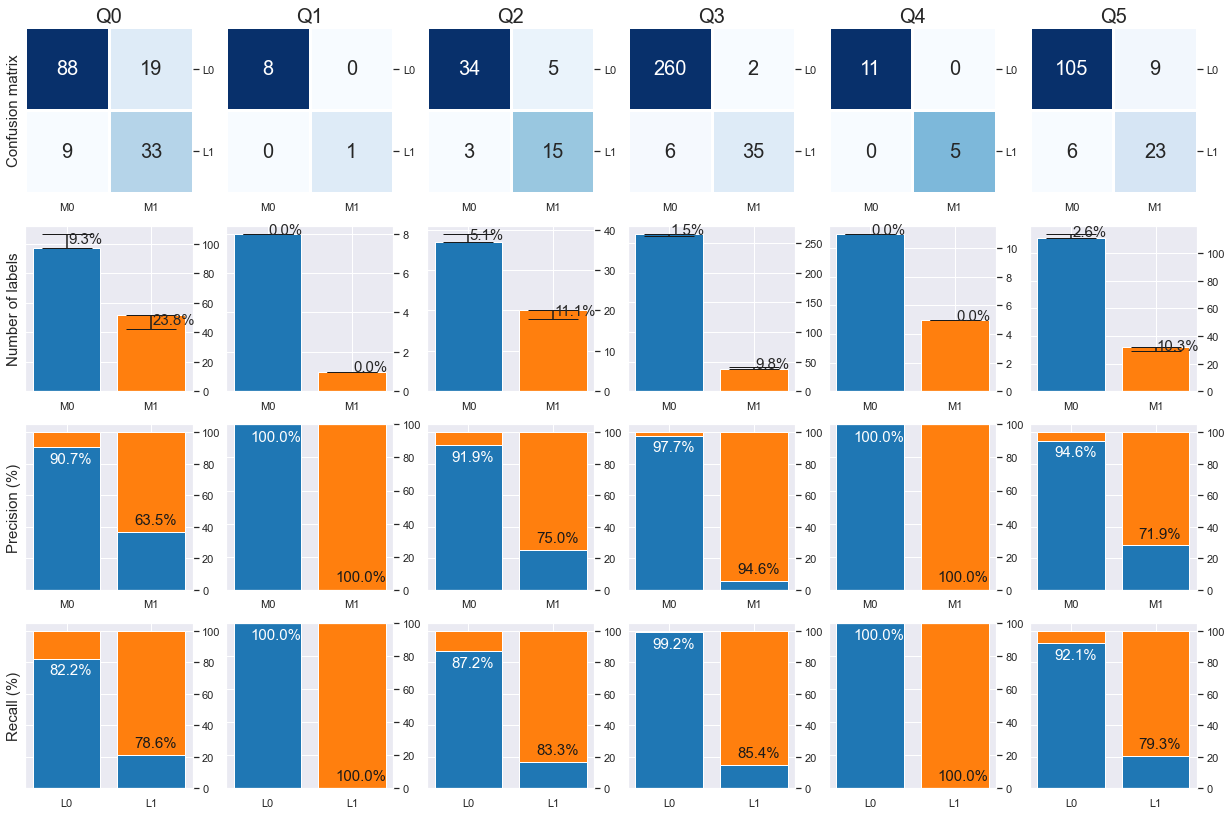

In [601]:
beto_cfm = {}
fig, ax = plt.subplots(4, 6, figsize=(6*5*.7, 4*5*.7))
for ix in range(6):
    Q = ix
    cfm_raw = beto_comp[gpt_comp["tipo_preg"] == Q]["eq"].value_counts()
    cfm = np.zeros((2, 2))
    cfm[1, 1] = cfm_raw[1] if 1 in cfm_raw else 0
    cfm[0, 0] = cfm_raw[5] if 5 in cfm_raw else 0
    cfm[1, 0] = cfm_raw[25] if 25 in cfm_raw else 0
    cfm[0, 1] = cfm_raw[100] if 100 in cfm_raw else 0
    df_cfm = pd.DataFrame(cfm, columns="L0 L1".split(), index="M0 M1".split()).T
    beto_cfm[ix] = df_cfm
    ###
    yerr = df_cfm.T.sum(axis=1).values-df_cfm.T.sum(axis=0).values
    ax[1, ix].bar("M0 M1".split(), df_cfm.T.sum(axis=1), color =["tab:blue", "tab:orange"], width=0.8) 
    ax[1, ix].bar("M0 M1".split(), df_cfm.T.sum(axis=1)-yerr/2, alpha=0, width=0.8, yerr=yerr/2, capsize=25) 
    for i in range(2):
        yi = df_cfm.T.sum(axis=1)[i]-3*yerr[i]/8 if i == 0 else df_cfm.T.sum(axis=1)[i]-5*yerr[i]/8
        ax[1,ix].annotate(str(np.round(-100*yerr[i]/df_cfm.T.sum(axis=0).values[i], 1)).replace("-", "")+"%",
                         xy =(i, 0),
                         xytext =(i+0.015, yi), size=15)
#     ax[1,ix].set_title("Distribution (relative error)", size=20)
    if ix==0:
        ax[1,ix].set_ylabel("Number of labels", size=15)
#     ax[1,ix].set_xlabel("GPT-3 prediction", size=15);
    ax[1, ix].yaxis.tick_right()
    ###
    pr = 100*df_cfm/df_cfm.sum(axis=0)
    ax[2, ix].bar("M0 M1".split(), pr.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=pr.iloc[0])
    ax[2, ix].bar("M0 M1".split(), pr.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
#     ax[2, ix].set_title("Precision", size=20)
    if ix == 0:
        ax[2, ix].set_ylabel("Precision (%)", size=15)
#     ax[2, ix].set_xlabel("GPT-3 prediction", size=15);
    ax[2, ix].annotate(str(np.round(pr.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, pr.iloc[0,0]-10), size=15, color="w")
    ax[2, ix].annotate(str(np.round(pr.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-pr.iloc[1,1])+5), size=15, color="k")
    # ax[0, 1].yaxis.set_label_position("right")
    ax[2, ix].yaxis.tick_right()
    ###
    rl = 100*(df_cfm.T/df_cfm.T.sum(axis=0))
    ax[3, ix].bar("L0 L1".split(), rl.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=rl.iloc[0])
    ax[3, ix].bar("L0 L1".split(), rl.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
#     ax[3, ix].set_title("Recall", size=20, y=-0.35)
    if ix == 0:
        ax[3, ix].set_ylabel("Recall (%)", size=15)
    # ax[1, 1].yaxis.set_label_position("right")
#     ax[3, ix].set_xlabel("Ground truth", size=15);
    ax[3, ix].annotate(str(np.round(rl.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, rl.iloc[0,0]-10), size=15, color="w")
    ax[3, ix].annotate(str(np.round(rl.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-rl.iloc[1,1])+5), size=15, color="k")
    ax[3, ix].yaxis.tick_right()
    ###
    sns.heatmap(df_cfm, ax=ax[0, ix], annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=3, cmap="Blues", cbar=False);
    if ix==0:
        ax[0, ix].set_ylabel("Confusion matrix", size=15);
#     ax[0, ix].set_xlabel("GPT-3 prediction", size=15);
    ax[0, ix].set_title(f"Q{Q}", size=20);
    ax[0, ix].yaxis.tick_right()
    plt.setp(ax[0, ix].get_yticklabels(), rotation=0)
#     plt.suptitle(f"GPT-3", size=25, y=1)

In [603]:
import scipy.stats as sts

In [607]:
pr_gpt_p_val = {}
for ix in range(6):
    for jx in range(6):
        if jx < ix:
            cfmi = gpt_cfm[ix]
            cfmj = gpt_cfm[jx]
        elif jx==ix:
            cfmi = gpt_cfm[ix]
            cfmj = beto_cfm[jx]
        else:
            cfmi = beto_cfm[jx]
            cfmj = beto_cfm[ix]

        xi = cfmi.iloc[1, 1]
        ni = cfmi.sum().iloc[1]

        xj = cfmj.iloc[1, 1]
        nj = cfmj.sum().iloc[1]

        pij = (xi+xj)/(ni+nj)
        vij = (pij*(1-pij)*((1/ni) + (1/nj)))**0.5

        pi = xi/ni
        pj = xj/nj

        p_value = 1-sts.norm.cdf(pi-pj, loc=0, scale=vij) if pi-pj>0 else 1-sts.norm.cdf(-pi+pj, loc=0, scale=vij) 
        pr_gpt_p_val[(ix, jx)] = [np.round(100*(pi-pj), 1), p_value]

C:\Users\felip\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0.5, -0.18, '$\\Delta$ Precision')

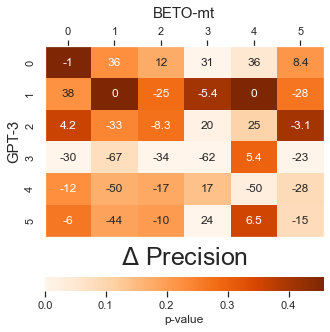

In [608]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax2 = ax.twiny()
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlabel("BETO-mt", size=15)
ax2.xaxis.set_label_coords(0.5, 1.15)

df_pr_gpt_p_val = pd.DataFrame(pr_gpt_p_val).T.reset_index()
p_values = df_pr_gpt_p_val[1].fillna(df_pr_gpt_p_val[1].max()).values.reshape(6, 6)
values = df_pr_gpt_p_val[0].values.reshape(6, 6)
sns.heatmap(p_values, vmin=0, annot=values, cmap="Oranges", ax=ax, cbar_kws = dict(use_gridspec=True,location="bottom",label='p-value'));
ax.xaxis.set_ticks_position('top')
ax.set_ylabel("GPT-3", size=15);
plt.title(f"$\Delta$ Precision", size=25, y=-.18)


In [609]:
rl_gpt_p_val = {}
for ix in range(6):
    for jx in range(6):
        if jx < ix:
            cfmi = gpt_cfm[ix]
            cfmj = gpt_cfm[jx]
        elif jx==ix:
            cfmi = gpt_cfm[ix]
            cfmj = beto_cfm[jx]
        else:
            cfmi = beto_cfm[jx]
            cfmj = beto_cfm[ix]

        xi = cfmi.iloc[1, 1]
        ni = cfmi.T.sum().iloc[1]

        xj = cfmj.iloc[1, 1]
        nj = cfmj.T.sum().iloc[1]

        pij = (xi+xj)/(ni+nj)
        vij = (pij*(1-pij)*((1/ni) + (1/nj)))**0.5

        pi = xi/ni
        pj = xj/nj

        p_value = 1-sts.norm.cdf(pi-pj, loc=0, scale=vij) if pi-pj>0 else 1-sts.norm.cdf(-pi+pj, loc=0, scale=vij) 
        rl_gpt_p_val[(ix, jx)] = [np.round(100*(pi-pj), 1), p_value]

C:\Users\felip\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0.5, -0.18, '$\\Delta$ Recall')

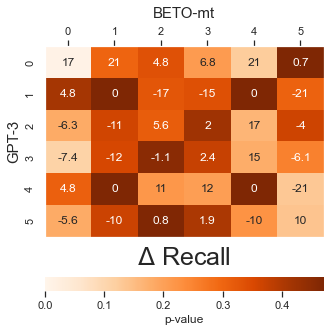

In [610]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax2 = ax.twiny()
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlabel("BETO-mt", size=15)
ax2.xaxis.set_label_coords(0.5, 1.15)

df_rl_gpt_p_val = pd.DataFrame(rl_gpt_p_val).T.reset_index()
p_values = df_rl_gpt_p_val[1].fillna(df_rl_gpt_p_val[1].max()).values.reshape(6, 6)
values = df_rl_gpt_p_val[0].values.reshape(6, 6)
sns.heatmap(p_values, vmin=0, annot=values, cmap="Oranges", ax=ax, cbar_kws = dict(use_gridspec=True,location="bottom",label='p-value'));
ax.xaxis.set_ticks_position('top')
ax.set_ylabel("GPT-3", size=15);
plt.title(f"$\Delta$ Recall", size=25, y=-.18)


In [611]:
pr_gpt_p_val = {}
for ix in range(6):
    for jx in range(6):
        if jx < ix:
            cfmi = gpt_cfm[ix]
            cfmj = gpt_cfm[jx]
        elif jx==ix:
            cfmi = gpt_cfm[ix]
            cfmj = beto_cfm[jx]
        else:
            cfmi = beto_cfm[jx]
            cfmj = beto_cfm[ix]

        xi = cfmi.iloc[0, 0]
        ni = cfmi.sum().iloc[0]

        xj = cfmj.iloc[0, 0]
        nj = cfmj.sum().iloc[0]

        pij = (xi+xj)/(ni+nj)
        vij = (pij*(1-pij)*((1/ni) + (1/nj)))**0.5

        pi = xi/ni
        pj = xj/nj

        p_value = 1-sts.norm.cdf(pi-pj, loc=0, scale=vij) if pi-pj>0 else 1-sts.norm.cdf(-pi+pj, loc=0, scale=vij) 
        pr_gpt_p_val[(ix, jx)] = [np.round(100*(pi-pj), 1), p_value]

C:\Users\felip\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0.5, -0.18, '$\\Delta$ Precision')

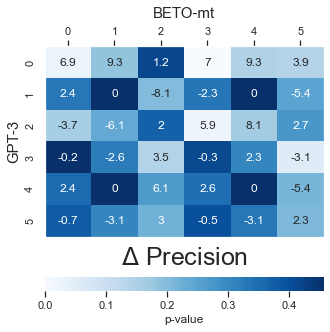

In [612]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax2 = ax.twiny()
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlabel("BETO-mt", size=15)
ax2.xaxis.set_label_coords(0.5, 1.15)

df_pr_gpt_p_val = pd.DataFrame(pr_gpt_p_val).T.reset_index()
p_values = df_pr_gpt_p_val[1].fillna(df_pr_gpt_p_val[1].max()).values.reshape(6, 6)
values = df_pr_gpt_p_val[0].values.reshape(6, 6)
sns.heatmap(p_values, vmin=0, annot=values, cmap="Blues", ax=ax, cbar_kws = dict(use_gridspec=True,location="bottom",label='p-value'));
ax.xaxis.set_ticks_position('top')
ax.set_ylabel("GPT-3", size=15);
plt.title(f"$\Delta$ Precision", size=25, y=-.18)


In [613]:
rl_gpt_p_val = {}
for ix in range(6):
    for jx in range(6):
        if jx < ix:
            cfmi = gpt_cfm[ix]
            cfmj = gpt_cfm[jx]
        elif jx==ix:
            cfmi = gpt_cfm[ix]
            cfmj = beto_cfm[jx]
        else:
            cfmi = beto_cfm[jx]
            cfmj = beto_cfm[ix]

        xi = cfmi.iloc[0, 0]
        ni = cfmi.T.sum().iloc[0]

        xj = cfmj.iloc[0, 0]
        nj = cfmj.T.sum().iloc[0]

        pij = (xi+xj)/(ni+nj)
        vij = (pij*(1-pij)*((1/ni) + (1/nj)))**0.5

        pi = xi/ni
        pj = xj/nj

        p_value = 1-sts.norm.cdf(pi-pj, loc=0, scale=vij) if pi-pj>0 else 1-sts.norm.cdf(-pi+pj, loc=0, scale=vij) 
        rl_gpt_p_val[(ix, jx)] = [np.round(100*(pi-pj), 1), p_value]

C:\Users\felip\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0.5, -0.18, '$\\Delta$ Recall')

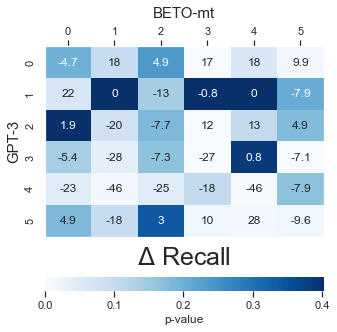

In [614]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax2 = ax.twiny()
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlabel("BETO-mt", size=15)
ax2.xaxis.set_label_coords(0.5, 1.15)

df_rl_gpt_p_val = pd.DataFrame(rl_gpt_p_val).T.reset_index()
p_values = df_rl_gpt_p_val[1].fillna(df_rl_gpt_p_val[1].max()).values.reshape(6, 6)
values = df_rl_gpt_p_val[0].values.reshape(6, 6)
sns.heatmap(p_values, vmin=0, annot=values, cmap="Blues", ax=ax, cbar_kws = dict(use_gridspec=True,location="bottom",label='p-value'));
ax.xaxis.set_ticks_position('top')
ax.set_ylabel("GPT-3", size=15);
plt.title(f"$\Delta$ Recall", size=25, y=-.18)
